In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
train_data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')


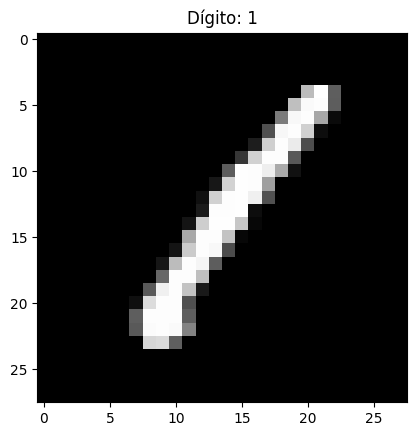

In [17]:
import matplotlib.pyplot as plt
import numpy as np

first_image=train_data.iloc[0,1:].values
first_image=first_image.reshape(28, 28)

plt.imshow(first_image, cmap='gray')
plt.title(f'Dígito: {train_data.iloc[0,0]}')
plt.show()

In [19]:
X_train=train_data.drop(columns='label').values
y_train=train_data['label'].values 
X_test=test_data.values

X_train=X_train/255.0
X_test=X_test/255.0

In [28]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.2, random_state=20)

model=Sequential([
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Pérdida en validación: {val_loss}')
print(f'Precisión en validación: {val_accuracy}')

Epoch 1/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8101 - loss: 0.6691 - val_accuracy: 0.9418 - val_loss: 0.2039
Epoch 2/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9445 - loss: 0.1942 - val_accuracy: 0.9555 - val_loss: 0.1566
Epoch 3/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9616 - loss: 0.1315 - val_accuracy: 0.9581 - val_loss: 0.1374
Epoch 4/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9711 - loss: 0.0958 - val_accuracy: 0.9652 - val_loss: 0.1099
Epoch 5/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9803 - loss: 0.0681 - val_accuracy: 0.9684 - val_loss: 0.1048
Epoch 6/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9858 - loss: 0.0508 - val_accuracy: 0.9676 - val_loss: 0.1057
Epoch 7/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9913 - loss: 0.0363 - val_accuracy: 0.9701 - val_loss: 0.1004
Epoch 8/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9927 - loss: 0.0290 - val_accuracy: 0.

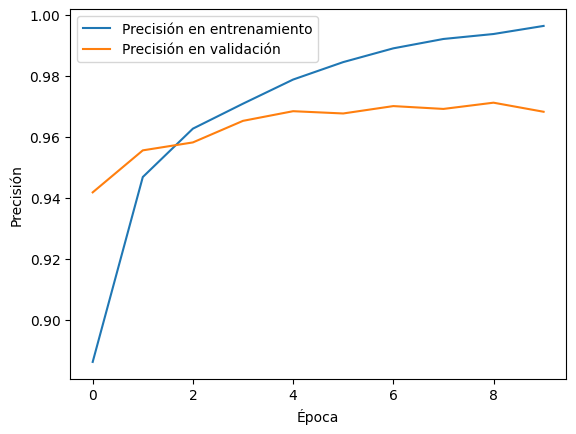

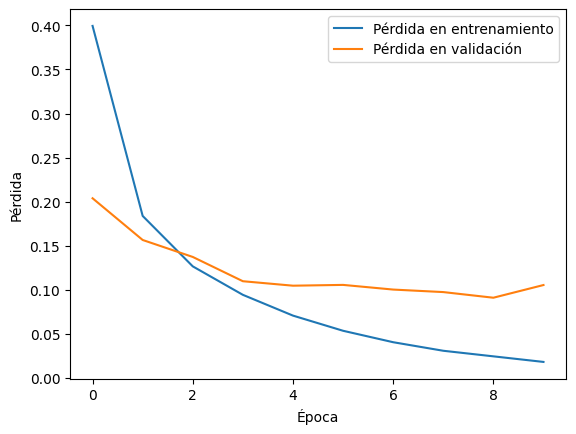

In [29]:
import matplotlib.pyplot as plt

# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [31]:
#Como se puede comprobar, a partir de la 5 epoca la red comienza a sobreajustarse, por lo que el modelo2 para ahí

model2=Sequential([
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model2.fit(X_train, y_train, epochs=6, validation_data=(X_val, y_val))

val_loss, val_accuracy = model2.evaluate(X_val, y_val)
print(f'Pérdida en validación: {val_loss}')
print(f'Precisión en validación: {val_accuracy}')

Epoch 1/6
672/672 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8249 - loss: 0.6307 - val_accuracy: 0.9345 - val_loss: 0.2229
Epoch 2/6
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9449 - loss: 0.1926 - val_accuracy: 0.9570 - val_loss: 0.1539
Epoch 3/6
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9635 - loss: 0.1288 - val_accuracy: 0.9546 - val_loss: 0.1471
Epoch 4/6
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9720 - loss: 0.0992 - val_accuracy: 0.9637 - val_loss: 0.1222
Epoch 5/6
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9797 - loss: 0.0696 - val_accuracy: 0.9671 - val_loss: 0.1065
Epoch 6/6
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9849 - loss: 0.0539 - val_accuracy: 0.9671 - val_loss: 0.1070
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9653 - loss: 0.1210
Pérdida en validación: 0.10698958486318588
Precisión en validación: 0.9670758843421936


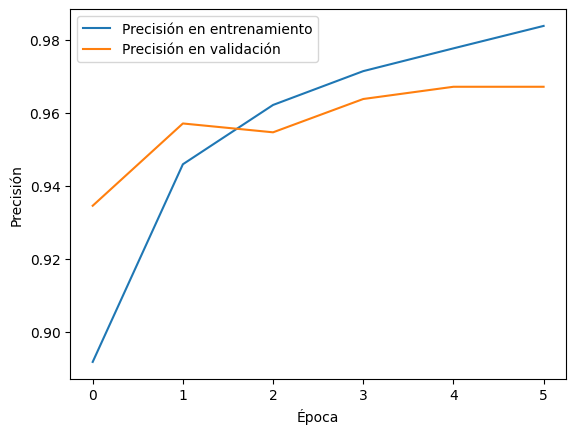

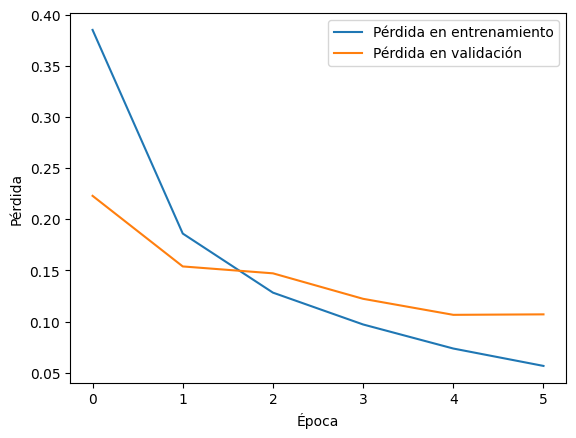

In [32]:
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [33]:
predictions=model2.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [34]:
predicted_labels=np.argmax(predictions,axis=1)
submission = pd.DataFrame({'ImageId': np.arange(1, len(predicted_labels) + 1), 'Label': predicted_labels})
submission.to_csv('submission.csv', index=False)
